In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_dir = 'data'
output_dir = '.'
os.makedirs(output_dir, exist_ok=True)

## **1. Load the datasets**

In [3]:
train_data, train_meta = arff.loadarff('data/ECG5000_TRAIN.arff')
test_data, test_meta = arff.loadarff('data/ECG5000_TEST.arff')


#Combine train and test data 

all_data = np.concatenate([train_data, test_data])

# Convert structured array to numpy array 
ecg_signals = np.array([list(x)[:-1] for x in all_data])  # Last element is the class

ecg_classes = np.array([x[-1] for x in all_data])

In [6]:
ecg_signals

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.12343082,
         0.92528624,  0.19313742],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  0.77381971,
         1.1196209 , -1.4362499 ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.32109663,
         0.90422673, -0.42179659],
       ...,
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -2.2600228 ,
        -1.577823  , -0.68453092],
       [-1.1244318 , -1.9050388 , -2.1927069 , ..., -0.4433066 ,
        -0.55976901,  0.10856792],
       [ 0.72881283,  0.19259731, -0.73388442, ...,  1.5389752 ,
         1.713781  ,  1.3093816 ]], shape=(5000, 140))

In [5]:
ecg_classes

array([b'1', b'1', b'1', ..., b'2', b'2', b'2'],
      shape=(5000,), dtype='|S1')

## **2. Normalize the data**

In [7]:
# Normalize signals (z-score)
ecg_signals = (ecg_signals - np.mean(ecg_signals, axis=1,
               keepdims=True)) / np.std(ecg_signals, axis=1, keepdims=True)

# Get unique classes
unique_classes = np.unique(ecg_classes)
print(
    f"Dataset loaded with {len(ecg_signals)} signals and classes: {unique_classes}")

Dataset loaded with 5000 signals and classes: [b'1' b'2' b'3' b'4' b'5']


## **Time Domain Visualization**

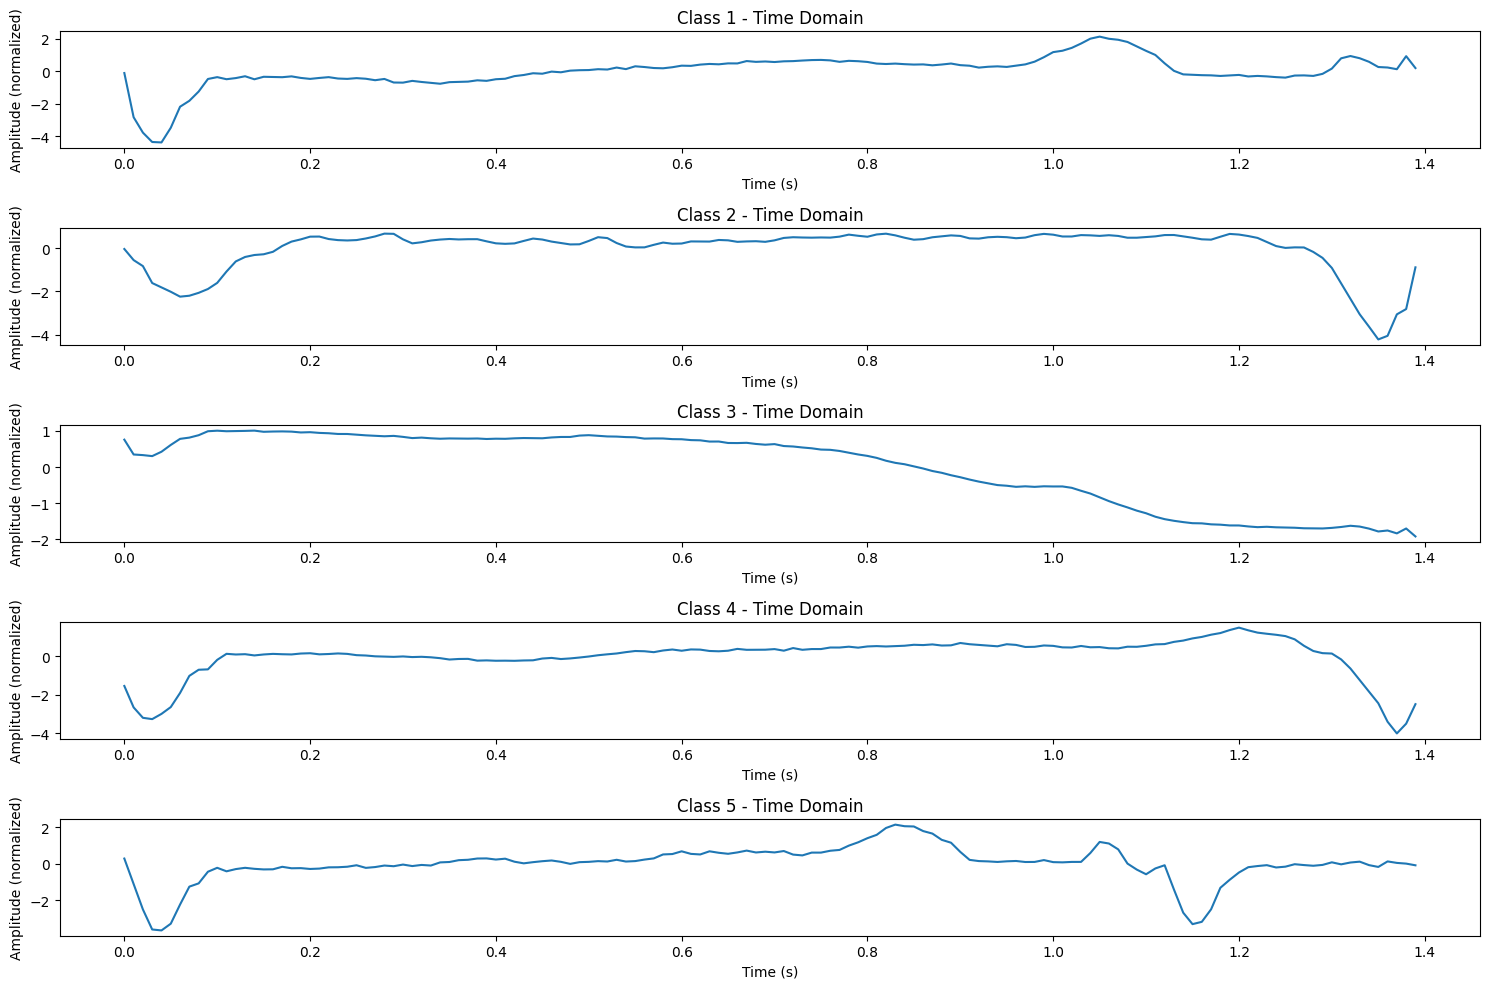

In [8]:
plt.figure(figsize=(15, 10))

for i, cls in enumerate(unique_classes):
    # Get first signal of each class
    idx = np.where(ecg_classes == cls)[0][0]
    signal = ecg_signals[idx]
    time = np.arange(len(signal)) / 100  # Assuming 100Hz sample rate

    plt.subplot(len(unique_classes), 1, i+1)
    plt.plot(time, signal)
    plt.title(f'Class {cls.decode("utf-8")} - Time Domain')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (normalized)')

plt.tight_layout()
plt.show()

## **Frequency Domain Analysis**

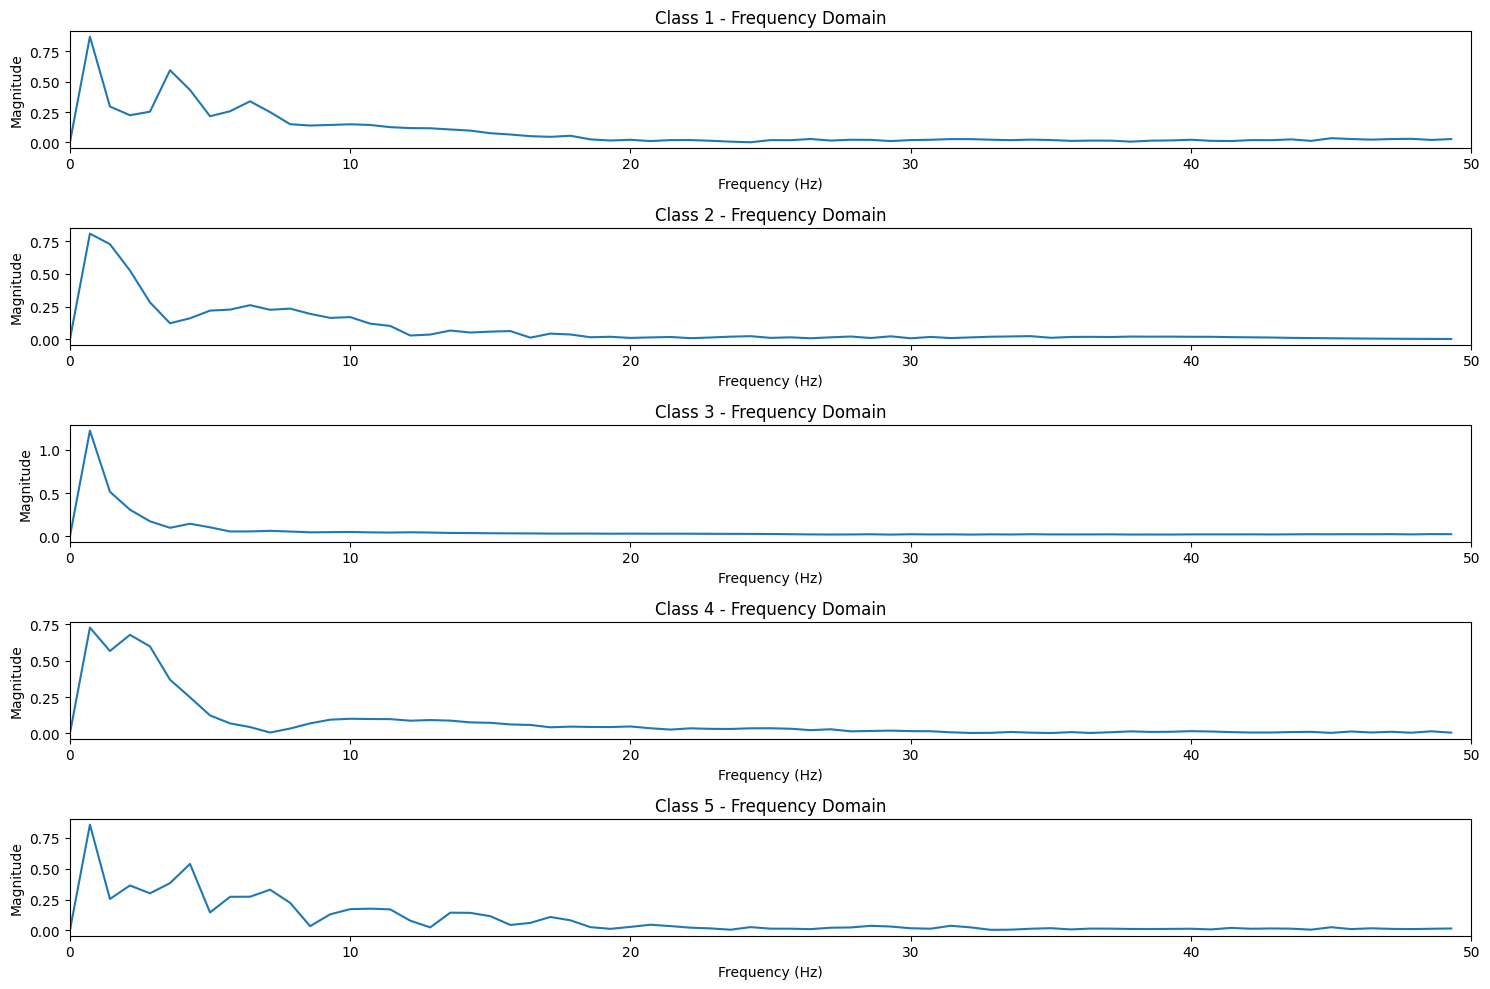

In [9]:
plt.figure(figsize=(15, 10))

for i, cls in enumerate(unique_classes):
    # Get first signal of each class
    idx = np.where(ecg_classes == cls)[0][0]
    signal = ecg_signals[idx]
    n = len(signal)

    # Apply FFT
    yf = fft(signal)
    xf = fftfreq(n, 1/100)[:n//2]  # 100Hz sample rate

    plt.subplot(len(unique_classes), 1, i+1)
    plt.plot(xf, 2/n * np.abs(yf[:n//2]))
    plt.title(f'Class {cls.decode("utf-8")} - Frequency Domain')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 50)  # Focus on 0-50Hz range for ECG

plt.tight_layout()
plt.show()

## **Power Spectral Density and Spectrogram**

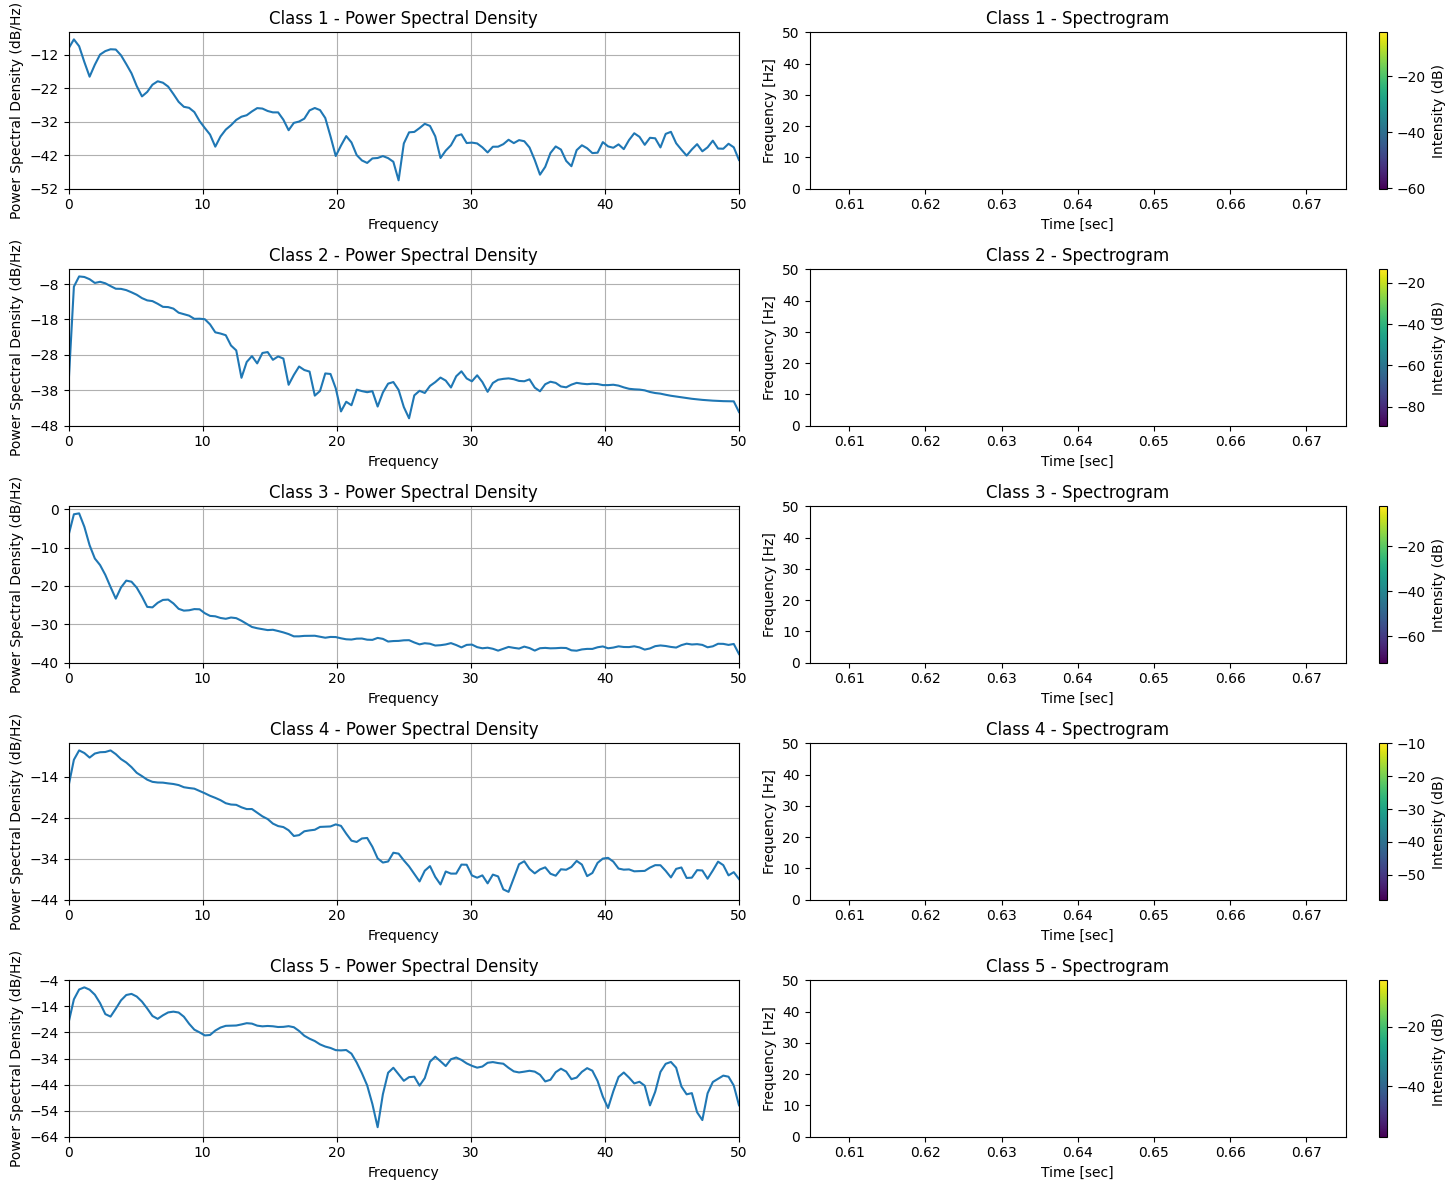

In [10]:
plt.figure(figsize=(15, 12))

for i, cls in enumerate(unique_classes):
    # Get first signal of each class
    idx = np.where(ecg_classes == cls)[0][0]
    signal = ecg_signals[idx]

    # PSD plot
    plt.subplot(len(unique_classes), 2, 2*i+1)
    plt.psd(signal, Fs=100, NFFT=256)
    plt.title(f'Class {cls.decode("utf-8")} - Power Spectral Density')
    plt.xlim(0, 50)

    # Spectrogram plot
    plt.subplot(len(unique_classes), 2, 2*i+2)
    f, t, Sxx = spectrogram(signal, fs=100, nperseg=128)
    plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud', cmap='viridis')
    plt.colorbar(label='Intensity (dB)')
    plt.title(f'Class {cls.decode("utf-8")} - Spectrogram')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0, 50)

plt.tight_layout()
plt.show()

## **Concatenated Heartbeats by Class**

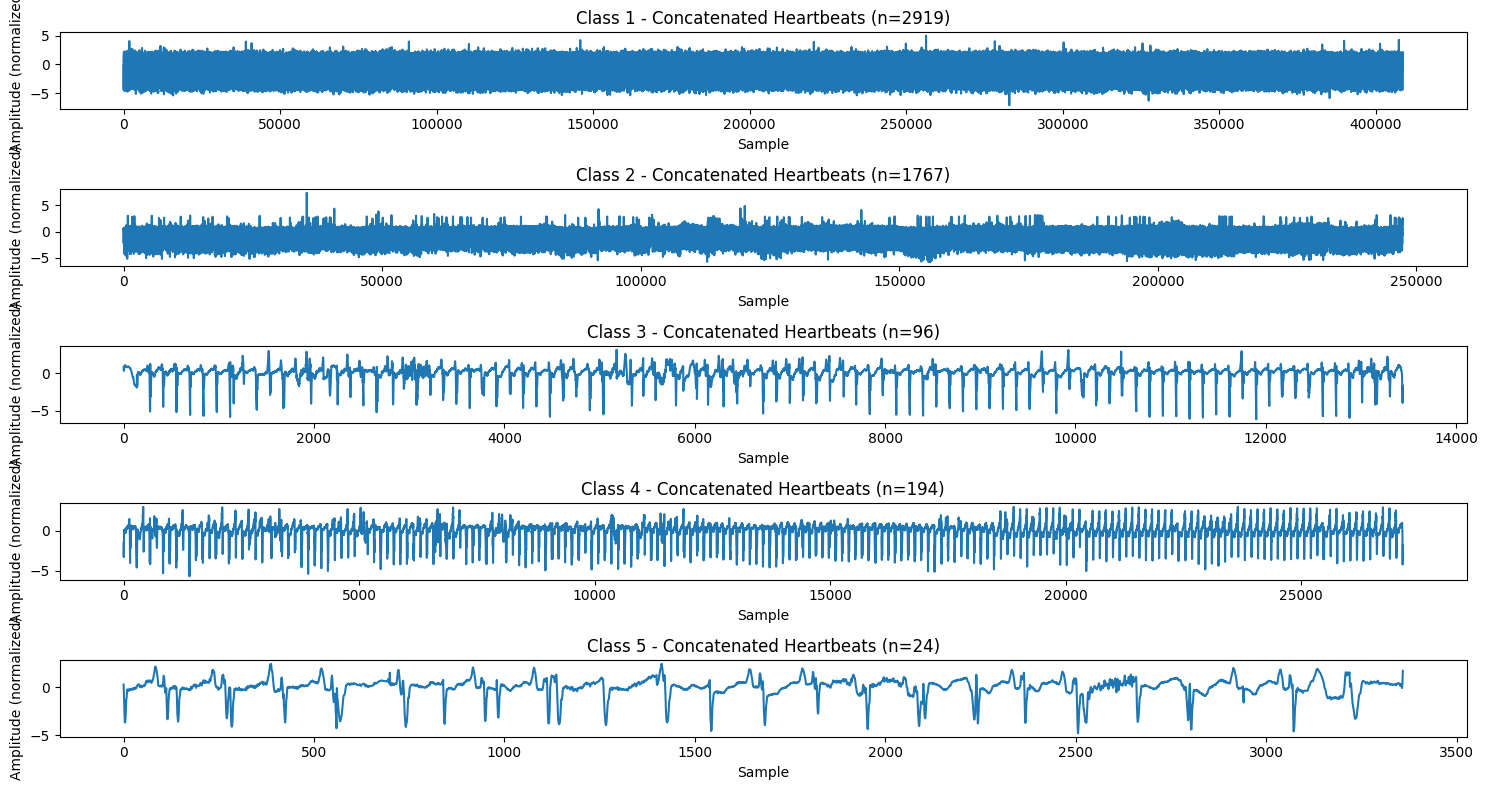

In [11]:
plt.figure(figsize=(15, 8))

for i, cls in enumerate(unique_classes):
    # Get all signals for this class
    class_signals = ecg_signals[ecg_classes == cls]

    # Concatenate them
    concatenated = np.concatenate(class_signals)

    plt.subplot(len(unique_classes), 1, i+1)
    plt.plot(concatenated)
    plt.title(
        f'Class {cls.decode("utf-8")} - Concatenated Heartbeats (n={len(class_signals)})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude (normalized)')

plt.tight_layout()
plt.show()

## **Heartbeat Clusters**

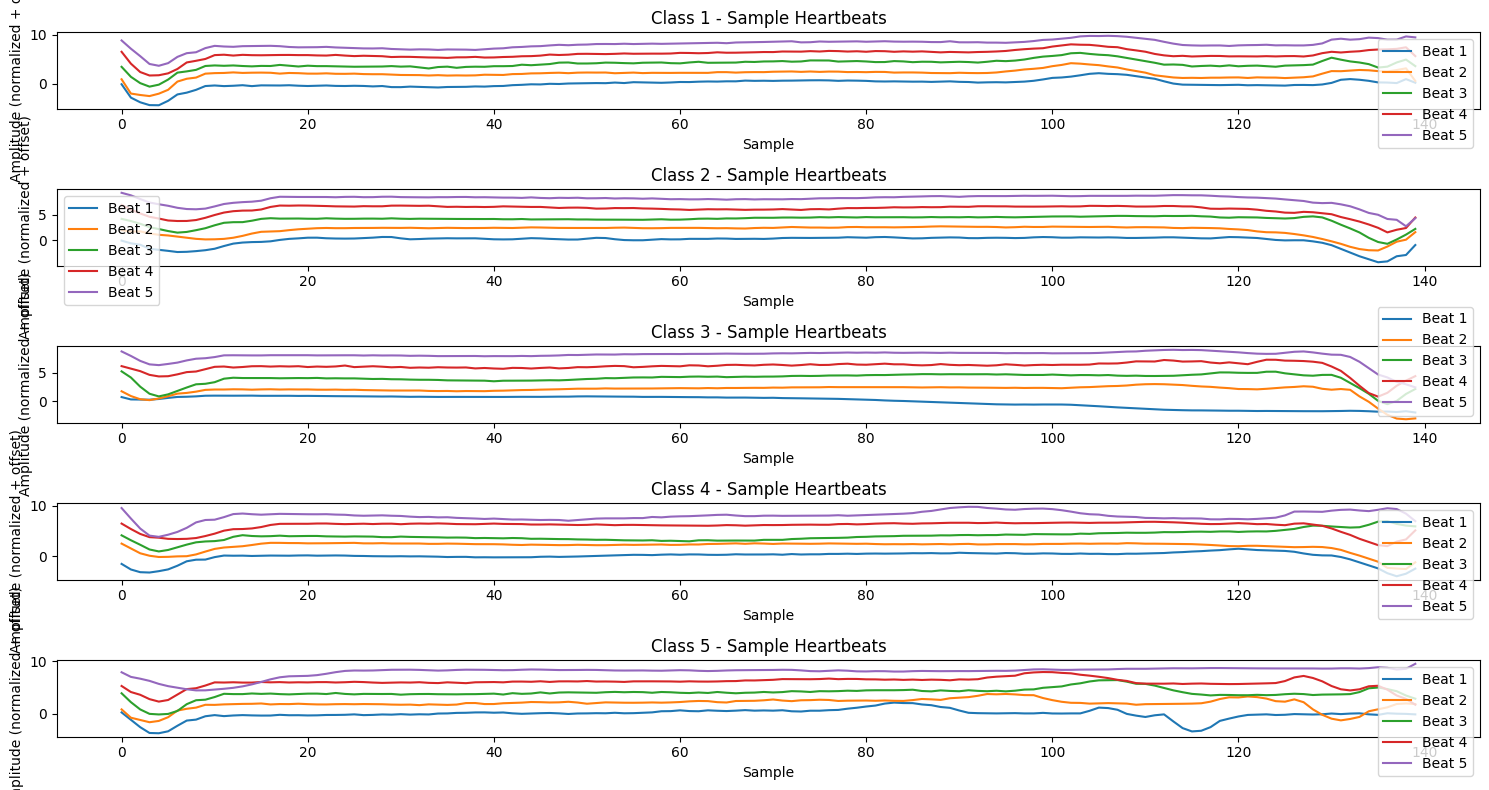

In [12]:
plt.figure(figsize=(15, 8))

for i, cls in enumerate(unique_classes):
    # Get first 5 signals of each class
    class_signals = ecg_signals[ecg_classes == cls][:5]

    plt.subplot(len(unique_classes), 1, i+1)
    for j, signal in enumerate(class_signals):
        plt.plot(signal + j*2, label=f'Beat {j+1}')  # Offset for visibility
    plt.title(f'Class {cls.decode("utf-8")} - Sample Heartbeats')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude (normalized + offset)')
    plt.legend()

plt.tight_layout()
plt.show()